,station,name,latitude,longitude,elevation,date,temperature_type,temperature_value
0,USW00094728,"NY CITY CENTRAL PARK, NY US",40.77898,-73.96925,42.7,1869-12-01,maximum_temperature,62
1,USW00094728,"NY CITY CENTRAL PARK, NY US",40.77898,-73.96925,42.7,1869-12-02,maximum_temperature,33
2,USW00094728,"NY CITY CENTRAL PARK, NY US",40.77898,-73.96925,42.7,1869-12-03,maximum_temperature,29
3,USW00094728,"NY CITY CENTRAL PARK, NY US",40.77898,-73.96925,42.7,1869-12-04,maximum_temperature,37
4,USW00094728,"NY CITY CENTRAL PARK, NY US",40.77898,-73.96925,42.7,1869-12-05,maximum_temperature,39


111866


,station,name,latitude,longitude,elevation,decade,decade_label,temperature_type,temperature_value
0,USW00094728,"NY CITY CENTRAL PARK, NY US",40.77898,-73.96925,42.7,1860,1860s,maximum_temperature,40.838710
1,USW00094728,"NY CITY CENTRAL PARK, NY US",40.77898,-73.96925,42.7,1870,1870s,maximum_temperature,59.031763
2,USW00094728,"NY CITY CENTRAL PARK, NY US",40.77898,-73.96925,42.7,1880,1880s,maximum_temperature,58.560088
3,USW00094728,"NY CITY CENTRAL PARK, NY US",40.77898,-73.96925,42.7,1890,1890s,maximum_temperature,60.179901
4,USW00094728,"NY CITY CENTRAL PARK, NY US",40.77898,-73.96925,42.7,1900,1900s,maximum_temperature,59.960843


34


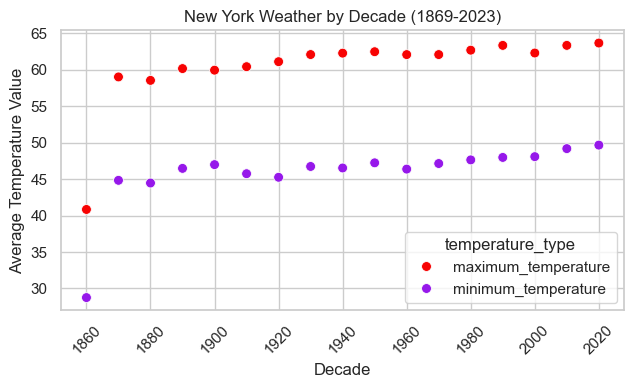

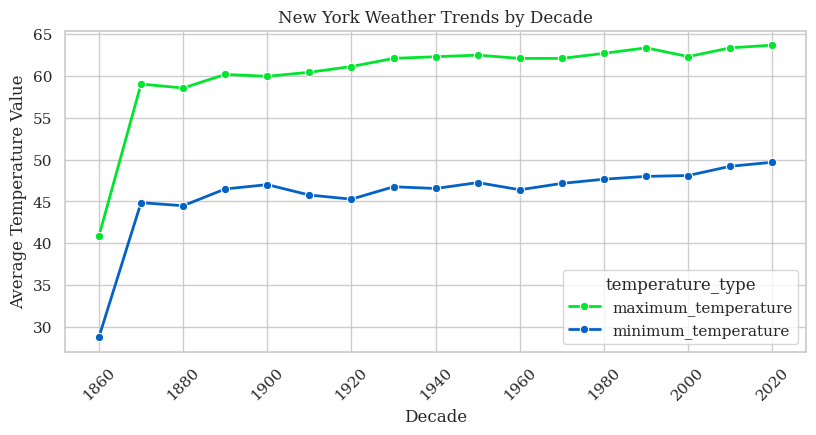

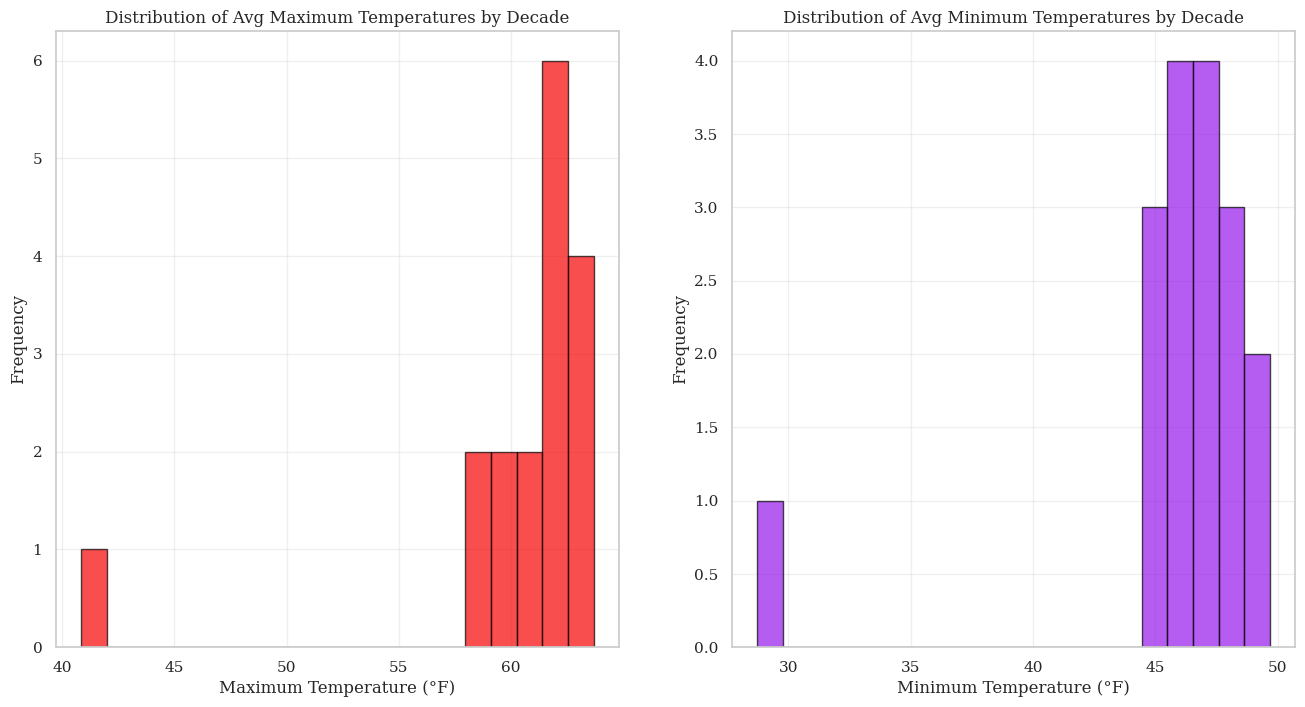

In [33]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv("3214998.csv")

df = df.rename(columns={
    'STATION': 'station',
    'NAME': 'name',
    'LATITUDE': 'latitude',
    'LONGITUDE': 'longitude',
    'ELEVATION': 'elevation',
    'DATE': 'date',
    'PSUN': 'probability_sunshine',
    'TAVG': 'average_temperature',
    'TMAX': 'maximum_temperature',
    'TMIN': 'minimum_temperature',
    'TOBS': 'observed_temperature',
    'TSUN': 'total_sunshine'
})
df = df.drop(columns=['observed_temperature', 'total_sunshine', 'probability_sunshine', 'average_temperature'])



df['date'] = pd.to_datetime(df['date'])

df['decade'] = (df['date'].dt.year // 10) * 10
df_decade = df.groupby(['decade', 'station', 'name', 'latitude', 'longitude', 'elevation']).agg({
    'maximum_temperature': 'mean',
    'minimum_temperature': 'mean'
}).reset_index()


df_decade['decade_label'] = df_decade['decade'].astype(str) + 's'
df_decade_melted = df_decade.melt(
    id_vars=['station', 'name', 'latitude', 'longitude', 'elevation', 'decade', 'decade_label'],
    value_vars=['maximum_temperature', 'minimum_temperature'],
    var_name='temperature_type',
    value_name='temperature_value'
)


display (df_melted.head())
print(df_melted.shape[0])

display(df_decade_melted.head())
print(df_decade_melted.shape[0])

#BASIC SCATTERPLOT
sns.set_theme(style="whitegrid")

custom_colors = ["#F70303", "#9618EA"]
plt.figure(figsize=(16, 8))
plt.subplot(2, 2, 1)
sns.scatterplot(data=df_decade_melted, x='decade', y='temperature_value', 
                hue='temperature_type', s=50, palette=custom_colors)
plt.title('New York Weather by Decade (1869-2023)')
plt.xlabel('Decade')
plt.ylabel('Average Temperature Value')
plt.xticks(rotation=45)


plt.rcParams.update({
    'font.size': 14,           
    'font.family': 'serif',    
    'font.weight': 'normal',   
})
plt.show()

#LINEPLOT
custom_colors_2 = ["#00E52E", "#0462C6"]
plt.figure(figsize=(16, 8))
plt.subplot(2, 2, 4)
sns.lineplot(data=df_decade_melted, x='decade', y='temperature_value', 
             hue='temperature_type', marker='o', palette=custom_colors_2, linewidth=2)
plt.title('New York Weather Trends by Decade')
plt.xlabel('Decade')
plt.ylabel('Average Temperature Value')
plt.xticks(rotation=45)

plt.tight_layout()

plt.rcParams.update({
    'font.size': 14,           
    'font.family': 'serif',    
    'font.weight': 'normal',   
})
plt.show()

#MAX AND MIN HISTOGRAMS
plt.figure(figsize=(16, 8))


plt.subplot(1, 2, 1)
max_temp_data = df_decade_melted[df_decade_melted['temperature_type'] == 'maximum_temperature']
plt.hist(max_temp_data['temperature_value'], bins=20, color=custom_colors[0], alpha=0.7, edgecolor='black')
plt.title('Distribution of Avg Maximum Temperatures by Decade')
plt.xlabel('Maximum Temperature (°F)')
plt.ylabel('Frequency')
plt.grid(True, alpha=0.3)


plt.subplot(1, 2, 2)
min_temp_data = df_decade_melted[df_decade_melted['temperature_type'] == 'minimum_temperature']
plt.hist(min_temp_data['temperature_value'], bins=20, color=custom_colors[1], alpha=0.7, edgecolor='black')
plt.title('Distribution of Avg Minimum Temperatures by Decade')
plt.xlabel('Minimum Temperature (°F)')
plt.ylabel('Frequency')
plt.grid(True, alpha=0.3)






I noticed that the 1860 decade was an outlier, and may not have had enough data as the average minimum and maximum temperature at the stations were quite low. Additionally, since I took the averages of all the data, this data may not be representative of some of the values, but since the dataset was large, this was the only way I could interpret the data efficiently. The average maximum temperature stayed between 60-65 degrees, slightly increasing in 2020. 